In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
bikes = pd.read_pickle('BikeDataImp.pkl')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [118]:
month_weather = bikes.groupby(bikes['Date'].dt.month)['Temperature'].mean()
month_weather

Date
1     -3.957460
2     -1.677009
3      8.049597
4     12.970278
5     18.129368
6     23.134375
7     27.766062
8     28.719556
9     21.490208
10    13.095161
11     7.785069
12    -1.932594
Name: Temperature, dtype: float64

<BarContainer object of 12 artists>

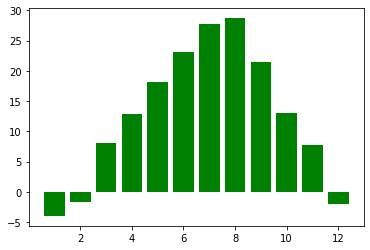

In [119]:
 plt.bar(month_weather.index, month_weather, color='green')

<BarContainer object of 12 artists>

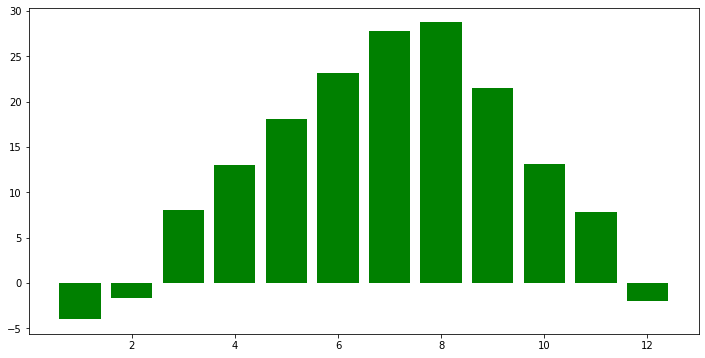

In [120]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(month_weather.index, month_weather, color='green')

In [121]:
bikes_week = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Rental Count'].sum()
bikes_week

week
1      39441
2      30871
3      42193
4      23079
5      28415
6      33259
7      32139
8      50136
9      52958
10     77316
11     90547
12     79109
13    118031
14     97000
15     98468
16    142918
17    141147
18    146127
19    136607
20    142346
21    189749
22    210326
23    211869
24    220392
25    213553
26    146455
27    183652
28    154848
29    172636
30    163447
31    135086
32    147911
33    166679
34    152282
35    138529
36    191800
37    186208
38    103925
39    124820
40     99622
41    159527
42    185695
43    141509
44    123557
45     66682
46    142787
47    103454
48    107727
49     48680
50     40147
51     31938
52     34460
Name: Rental Count, dtype: int64

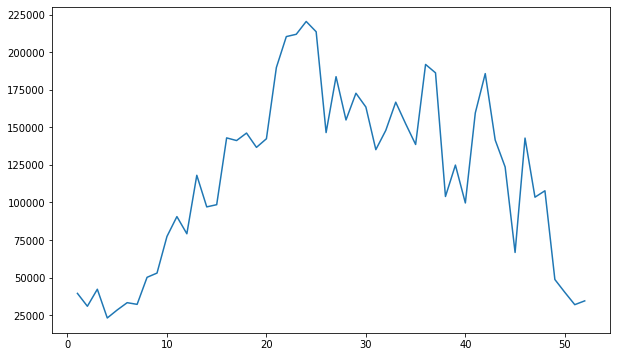

In [122]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(bikes_week)

In [123]:
seasons = bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum()
seasons

Seasons  Date      
Autumn   2018-09-01    25495
         2018-09-02    33943
         2018-09-03    10753
         2018-09-04    31363
         2018-09-05    34816
                       ...  
Winter   2018-02-24     6286
         2018-02-25     5780
         2018-02-26     9133
         2018-02-27     8923
         2018-02-28     3663
Name: Rental Count, Length: 365, dtype: int64

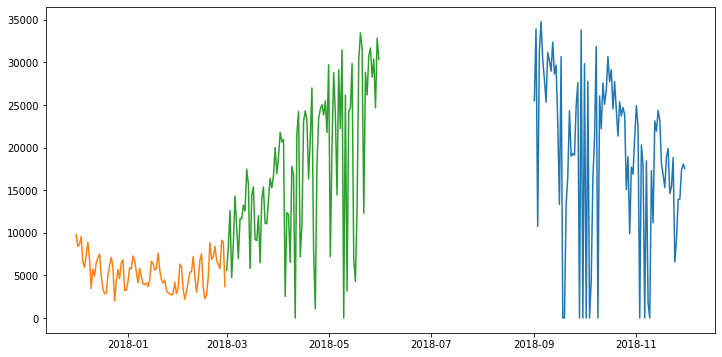

In [124]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(seasons.loc['Autumn'])
ax.plot(seasons.loc['Winter'])
ax.plot(seasons.loc['Spring'])

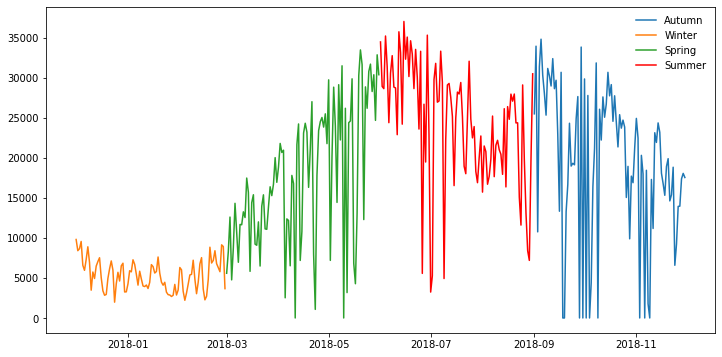

In [125]:
ax.plot(seasons.loc['Summer'], color='red')
ax.legend(['Autumn', 'Winter', 'Spring', 'Summer'], frameon=False)
fig

In [126]:
 daily_temp = bikes.groupby(['Seasons', 'Date'])['Temperature'].mean()
 daily_temp

Seasons  Date      
Autumn   2018-09-01    25.402083
         2018-09-02    24.987500
         2018-09-03    23.604167
         2018-09-04    23.254167
         2018-09-05    23.783333
                         ...    
Winter   2018-02-24     2.762500
         2018-02-25     1.916667
         2018-02-26     2.725000
         2018-02-27     3.958333
         2018-02-28     4.850000
Name: Temperature, Length: 365, dtype: float64

Text(0.5, 0.98, 'Temperature daily means by season')

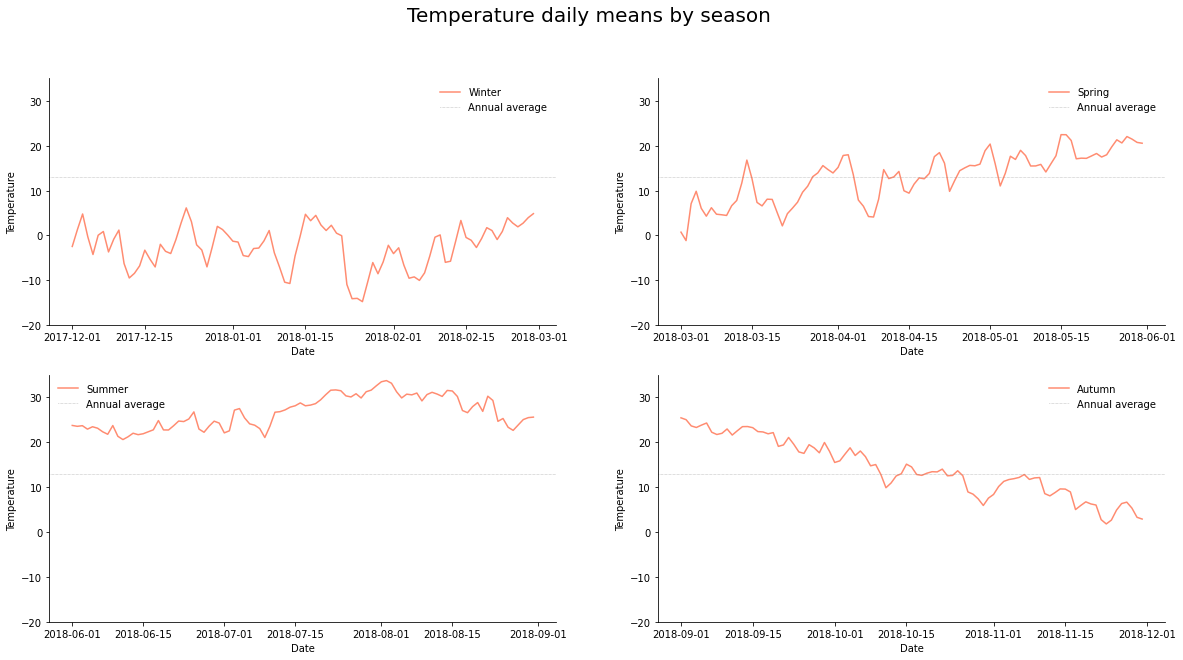

In [127]:
fig, ax = plt.subplots(2,2, figsize=(20, 10))
ax[0][0].plot(daily_temp.loc['Winter'], c='#ff8c71')
ax[0][1].plot(daily_temp.loc['Spring'], c='#ff8c71')
ax[1][0].plot(daily_temp.loc['Summer'], c='#ff8c71')
ax[1][1].plot(daily_temp.loc['Autumn'], c='#ff8c71')

for axis in ax.ravel():
  axis.set_ylim(-20, 35)
  axis.set_xlabel('Date')
  axis.set_ylabel('Temperature')
  axis.axhline(12.9, c='grey', lw=0.5, ls=':')
  axis.spines['right'].set_visible(False)
  axis.spines['top'].set_visible(False)

ax[0][0].legend(['Winter', 'Annual average'], frameon=False)
ax[0][1].legend(['Spring', 'Annual average'], frameon=False)
ax[1][0].legend(['Summer', 'Annual average'], frameon=False)
ax[1][1].legend(['Autumn', 'Annual average'], frameon=False)

fig.suptitle('Temperature daily means by season', fontsize=20)

In [128]:
fig.savefig('temps.pdf')

In [129]:
fig.savefig('temps.png', dpi=100)

In [130]:
for axis in ax.ravel():
  print(axis)

AxesSubplot(0.125,0.536818;0.352273x0.343182)
AxesSubplot(0.547727,0.536818;0.352273x0.343182)
AxesSubplot(0.125,0.125;0.352273x0.343182)
AxesSubplot(0.547727,0.125;0.352273x0.343182)


In [131]:
bikes['Temperature'].describe()

count    8760.000000
mean       12.877814
std        11.939144
min       -17.800000
25%         3.500000
50%        13.700000
75%        22.500000
max        39.400000
Name: Temperature, dtype: float64

In [132]:
bikes['No work day'] = np.where(bikes['Date'].dt.day_name().isin(['Saturday', 'Sunday']) + bikes['Holiday'], 1, 0)

In [133]:
bikes['Rainfall and Snowfall'] = bikes['Rainfall'] * 10 + bikes['Snowfall']

In [134]:
bikes_sum = bikes.groupby('Date')['Rental Count'].sum()
temp_avg = bikes.groupby('Date')['Temperature'].mean()
rainsnow_avg = bikes.groupby('Date')['Rainfall and Snowfall'].mean()
no_work = bikes.groupby('Date')['No work day'].max()

bikes_date = pd.concat([bikes_sum, temp_avg, rainsnow_avg, no_work], axis=1)
bikes_date

,Rental Count,Temperature,Rainfall and Snowfall,No work day
Date,,,,
2017-12-01,9802,-2.454167,0.000000,0
2017-12-02,8404,1.320833,0.000000,1
2017-12-03,8644,4.777083,1.666667,1
2017-12-04,9556,-0.304167,0.041667,0
2017-12-05,6578,-4.241667,0.000000,0
...,...,...,...,...
2018-11-26,13934,6.320833,0.120833,0
2018-11-27,13964,6.631250,0.000000,0
2018-11-28,17378,5.316667,0.000000,0


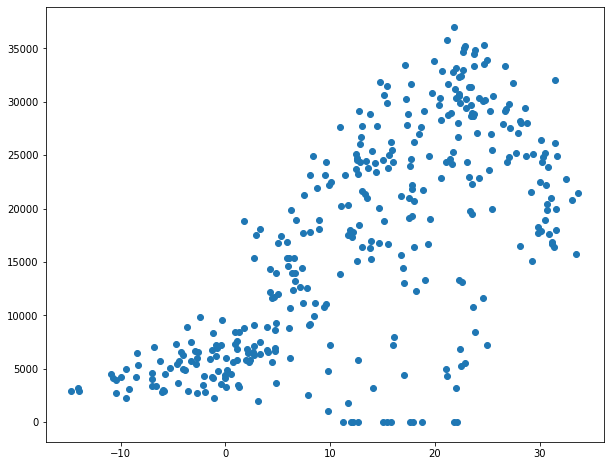

In [135]:
fig, ax =plt.subplots(figsize=(10,8))
ax.scatter(bikes_date['Temperature'], bikes_date['Rental Count'])

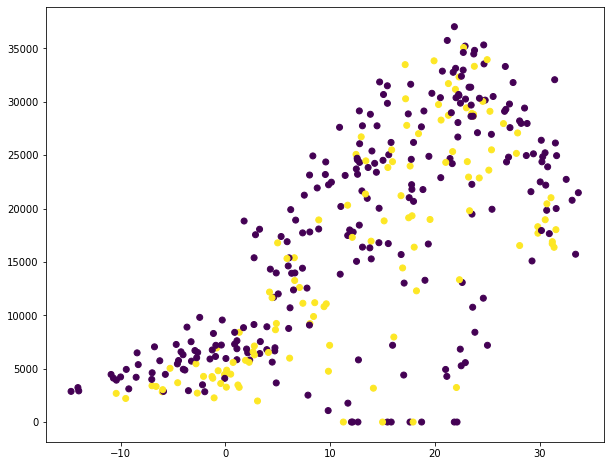

In [136]:
fig, ax =plt.subplots(figsize=(10,8))
ax.scatter(bikes_date['Temperature'], bikes_date['Rental Count'],
           c=bikes_date['No work day'])

Text(0.5, 1.0, 'Зависимость числа арендованных велосипедов в сутки от температуры, выходного дня и количества осадков')

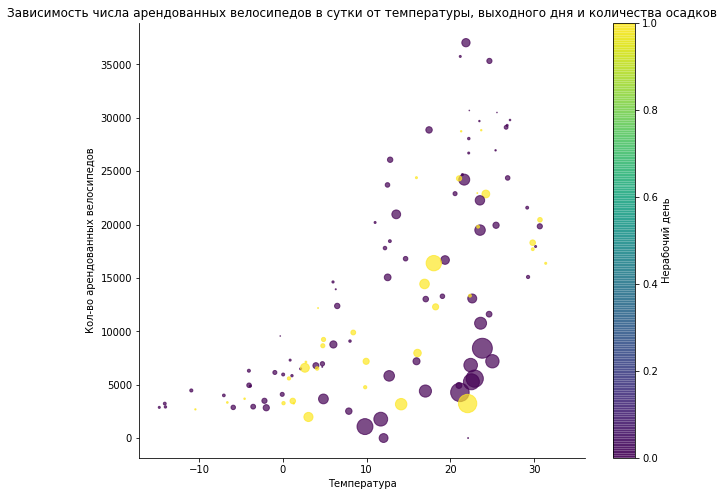

In [137]:
fig, ax = plt.subplots(figsize=(10,8))
graph = ax.scatter(bikes_date['Temperature'], bikes_date['Rental Count'],
           c=bikes_date['No work day'],
           s=bikes_date['Rainfall and Snowfall']*10,
           alpha=0.7)

plt.colorbar(graph, label='Нерабочий день')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Температура')
ax.set_ylabel('Кол-во арендованных велосипедов')

ax.set_title('Зависимость числа арендованных велосипедов в сутки от температуры, выходного дня и количества осадков')

In [138]:
fig.savefig('graph1.pdf')